In [1]:
# Part 1

def get_size(a,b):
    h = abs(a[0] - b[0]) + 1
    w = abs(a[1] - b[1]) + 1
    return h*w

with open("full.txt") as f:
    data = f.read().splitlines()

data = [eval(d) for d in data]

max_size = 0
for d1 in data:
    for d2 in data:
        s = get_size(d1, d2)
        if s > max_size:
            max_size = s
print(max_size)

4763932976


In [2]:
# def get_size(a,b):
#     h = abs(a[0] - b[0]) + 1
#     w = abs(a[1] - b[1]) + 1
#     return h*w

# def print_grid(data):
#     grid_size_x = max([d[0] for d in data]) + 2
#     grid_size_y = max([d[1] for d in data]) + 2

#     grid = [['.' for _ in range(grid_size_x)] for _ in range(grid_size_y)]

#     for point in data:
#         grid[point[1]][point[0]] = '#'

#     for line in grid:
#         print("".join(line))

# with open("test.txt") as f:
#     data = f.read().splitlines()

# data = [list(eval(d)) for d in data]

# print_grid(data)

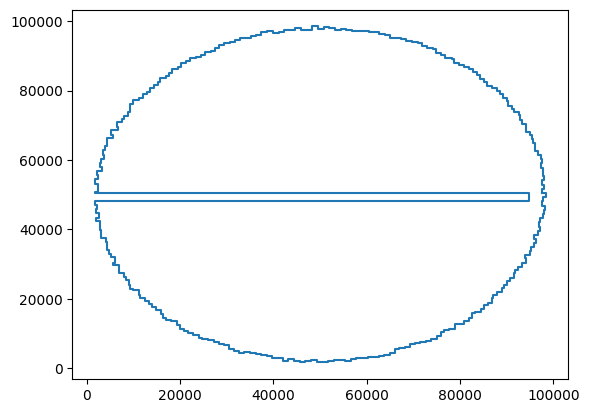

In [23]:
# Make algorithm to 'sort' red tiles, i.e. make an ordering that goes from one to the next
# Then, determine the border of the shape by connecting all the red tiles
# Then, find the green tiles that are enclosed by the border
# Then, check all combinations of red tiles to see if all tiles in the square are green or red
# ...
# Profit

import matplotlib.pyplot as plt
from shapely import Polygon, Point

def is_valid_square(d1:list[int], d2:list[int], polygon: Polygon):
    # [94904, 50444]
    # [94904, 48302]
    
    # if d1[0] < 94904:
    #     if (d1[1] > 50444 and d2[1] < 48302) or (d1[1] < 43802 and d2[1] > 50444):
    #         return 0
    
    min_x, max_x = min(d1[0], d2[0]), max(d1[0], d2[0])
    min_y, max_y = min(d1[1], d2[1]), max(d1[1], d2[1])
    # print(min_x, max_x, min_y, max_y)
    valid = True
    size = 0
    square = Polygon([[min_x, min_y], [min_x, max_y], [max_x, max_y], [max_x, min_y], [min_x, min_y]])
    if not polygon.covers(square):
        return 0
    return (max_x - min_x + 1)*(max_y - min_y + 1)

with open("full.txt") as f:
    data = f.read().splitlines()

data = [list(eval(d)) for d in data]

sorted_data = [data[0]]
data.remove(data[0])
while len(data) > 0:
    p1 = sorted_data[-1]
    for d in data:
        if d[0] == p1[0] or d[1] == p1[1]:
            sorted_data.append(d)
            data.remove(d)
            break
sorted_data.append(sorted_data[0])

p = Polygon(sorted_data)
x,y = p.exterior.xy
plt.plot(x,y)


In [25]:

max_size = 0
for i, d1 in enumerate(sorted_data[:-1]):
    for j, d2 in enumerate(sorted_data[i+1:]):
        s = is_valid_square(d1, d2, p)
        if s > max_size:
            print("Found new max size:", s)
            max_size = s
print(max_size)

Found new max size: 1895643
Found new max size: 603485773
Found new max size: 1501292304
1501292304


In [12]:
for i in range(len(sorted_data)-1):
    if sorted_data[i][0] - sorted_data[i+1][0] > 80000:
        print(sorted_data[i], sorted_data[i+1])

[94904, 48302] [1837, 48302]


In [13]:
for d in sorted_data:
    print(d)

[97603, 50471]
[97603, 51688]
[97910, 51688]
[97910, 52889]
[97643, 52889]
[97643, 54140]
[98081, 54140]
[98081, 55332]
[97733, 55332]
[97733, 56569]
[97800, 56569]
[97800, 57733]
[97343, 57733]
[97343, 58996]
[97483, 58996]
[97483, 60230]
[97398, 60230]
[97398, 61323]
[96693, 61323]
[96693, 62437]
[96148, 62437]
[96148, 63711]
[96183, 63711]
[96183, 64829]
[95675, 64829]
[95675, 66056]
[95497, 66056]
[95497, 67159]
[94960, 67159]
[94960, 68169]
[94210, 68169]
[94210, 69500]
[94227, 69500]
[94227, 70429]
[93325, 70429]
[93325, 71522]
[92799, 71522]
[92799, 72867]
[92741, 72867]
[92741, 73675]
[91676, 73675]
[91676, 74818]
[91222, 74818]
[91222, 75610]
[90195, 75610]
[90195, 77017]
[90123, 77017]
[90123, 77844]
[89172, 77844]
[89172, 78974]
[88649, 78974]
[88649, 79886]
[87830, 79886]
[87830, 80745]
[86952, 80745]
[86952, 81318]
[85759, 81318]
[85759, 82374]
[85127, 82374]
[85127, 83268]
[84311, 83268]
[84311, 84414]
[83739, 84414]
[83739, 85299]
[82895, 85299]
[82895, 86128]
[81997, 86